<a href="https://colab.research.google.com/github/waiyankyaw961999/Practice-End_to_End-Machine-Learning-/blob/main/End_to_End_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End_to_End Machine Learnig Model

## Collect Data from UCI ML repository

<h2>Data Set Information:</h2>

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)


Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [2]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

--2021-06-05 09:43:52--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: ‘auto-mpg.data’

auto-mpg.data       100%[===================>]  29.58K   197KB/s    in 0.2s    

2021-06-05 09:43:53 (197 KB/s) - ‘auto-mpg.data’ saved [30286/30286]



In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Loading Dataset

In [4]:
cols = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin']
df = pd.read_csv('/content/auto-mpg.data',
                   na_values = "?",
                   names = cols,
                   comment = "\t",
                   sep = " ",                  
                   skipinitialspace = True)

data = df.copy()

In [5]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


## Problem Statement

The goal is to build a model which can predict MPG for a particular vechicle based on the contributing factors of horsepower, model_year, cylinders, weight and displacement.

## Exploratory Data Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


The dataset contains 398 rows for each column. But for the column of horsepower, there are 6 empty rows. 

In [7]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


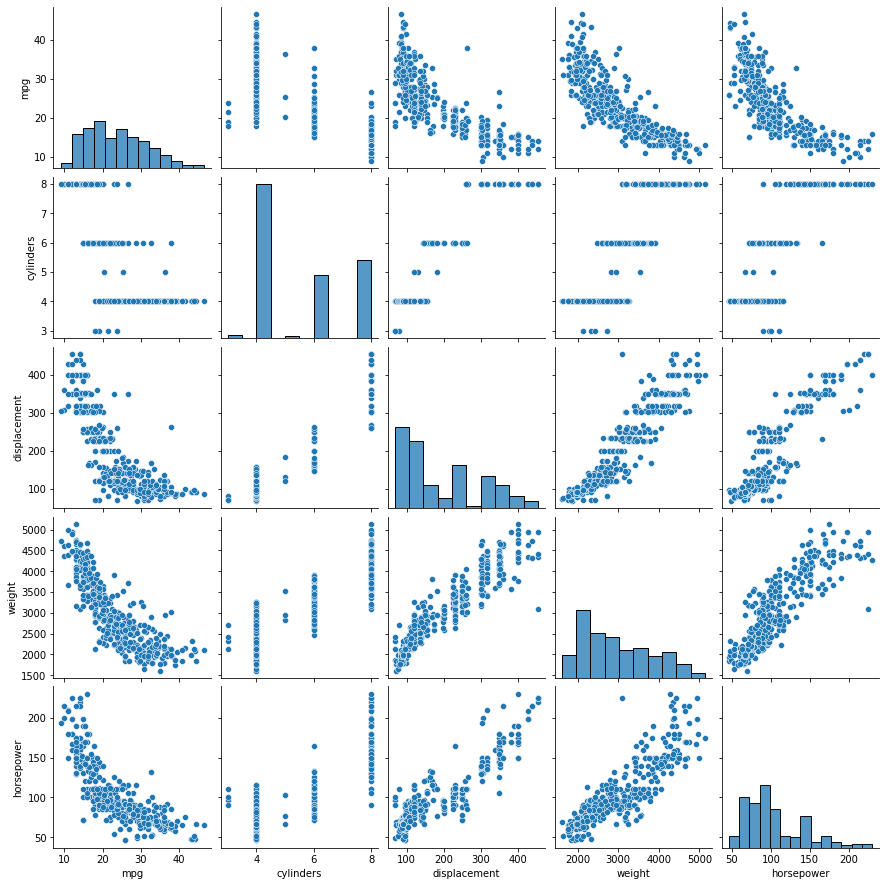

In [8]:
sns.pairplot(data[['mpg','cylinders','displacement','weight','horsepower']])

The following assumptions are made according to the above charts:
1. The feature 'mpg' is negatively correlated with the other features.
2. The feature 'Horse power' is positively correlated to the displacement and weight features.

Since we are going to use supervised learning model, we will set the mpg for our predicting parameter.


## Data Preparation

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

import warnings
warnings.filterwarnings('ignore')

In [10]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state= 42) # split the dataset by the index 

for train_index, test_index in split.split(data,data['cylinders']):
  strat_train_set = data.loc[train_index]
  strat_test_set = data.loc[test_index]

In [11]:
data = strat_train_set.iloc[:,1:]
labels = strat_train_set['mpg'].copy()
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2


## Processing

In [12]:
def preprocess_origins_cols(df):
  df['origin'] = df['origin'].map({1:"India",2:"USA",3:"Germany"})
  return df

data_train = preprocess_origins_cols(data)
data_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
145,4,83.0,61.0,2003.0,19.0,74,Germany
151,4,79.0,67.0,2000.0,16.0,74,USA
388,4,156.0,92.0,2585.0,14.5,82,India
48,6,250.0,88.0,3139.0,14.5,71,India
114,4,98.0,90.0,2265.0,15.5,73,USA


<h2> Adding Attributes using BaseEstimator and Transformer</h2>

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin

#creating custom attribute adder class
acc_ix, hpower_ix, cyl_ix = 4,2,0

class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True): # no *args or **kargs
        self.acc_on_power = acc_on_power
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix]
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl]
        
        return np.c_[X, acc_on_cyl]

## Creating a Pipeline of Tasks

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
    '''
    numerics = ['float64', 'int64']
    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),])
    return num_attrs, num_pipeline

def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    numerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["origin"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [16]:
#from raw data to processed data in 2 steps
data = strat_train_set.iloc[:,1:]
preprocessed_df = preprocess_origins_cols(data)
prepared_data = pipeline_transformer(preprocessed_df)
prepared_data

array([[-0.85657842, -1.07804475, -1.15192977, ...,  1.        ,
         0.        ,  0.        ],
       [-0.85657842, -1.1174582 , -0.9900351 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.85657842, -0.3587492 , -0.31547399, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.85657842, -0.56566984, -0.53133355, ...,  0.        ,
         1.        ,  0.        ],
       [-0.85657842, -0.78244384, -0.23452666, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.32260746, -0.45728283,  0.44003446, ...,  1.        ,
         0.        ,  0.        ]])

## Selecting and Training Models

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(prepared_data,labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
sample_data = data.iloc[:5]
sample_labels = labels.iloc[:5]
sample_data_prepared = pipeline_transformer(sample_data)

print("Prediction of samples: ", lin_reg.predict(sample_data_prepared))

Prediction of samples:  [29.08069379 27.78336755 26.08031176 12.70419279 22.23454159]


In [19]:
from sklearn.metrics import mean_squared_error

mpg_predictions = lin_reg.predict(prepared_data)
lin_mse = mean_squared_error(labels, mpg_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.9590402225760872

In [20]:
scores = cross_val_score(lin_reg, prepared_data, labels, scoring="neg_mean_squared_error", cv = 10)

lin_reg_rmse_scores = np.sqrt(-scores)
lin_reg_rmse = lin_reg_rmse_scores.mean()

## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(prepared_data, labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [22]:
mpg_predictions = tree_reg.predict(prepared_data)
tree_mse = mean_squared_error(labels, mpg_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [23]:
scores = cross_val_score(tree_reg, 
                         prepared_data, 
                         labels, 
                         scoring="neg_mean_squared_error", 
                         cv = 10)

tree_reg_rmse_scores = np.sqrt(-scores)
tree_reg_rmse_scores

array([3.2196176 , 3.08205492, 2.97725755, 3.60355727, 2.61187193,
       3.28114881, 3.22412779, 4.98563562, 4.13209312, 2.69443872])

In [26]:
tree_reg_rmse_scores.mean()
tree_reg_rmse = tree_reg_rmse_scores.mean()

## Random Forest model

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_data, labels)
forest_reg_cv_scores = cross_val_score(forest_reg,
                                         prepared_data,
                                         labels,
                                         scoring='neg_mean_squared_error',
                                         cv = 10)

forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
f_rmse = forest_reg_rmse_scores.mean()

## Support Vector Machine Regressor

In [28]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(prepared_data, labels)
svm_cv_scores = cross_val_score(svm_reg, prepared_data, labels,
                                scoring='neg_mean_squared_error',
                                cv = 10)

print(-svm_cv_scores)
svm_rmse_scores = np.sqrt(-svm_cv_scores)
svm_rmse = svm_rmse_scores.mean()
svm_rmse

[12.44390488  9.63704815 13.3761688   8.05558382  6.58769854  7.20647819
 11.81854584  5.51320558 14.87375082  8.09266788]


3.08659162080283

## Hyperparameter Tuning using GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(prepared_data,labels)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [31]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [32]:
cv_scores = grid_search.cv_results_

#printing all the parameters along with their scores
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(np.sqrt(-mean_score), params)

3.3727911263638686 {'max_features': 2, 'n_estimators': 3}
2.9877183345781098 {'max_features': 2, 'n_estimators': 10}
2.8417430250990194 {'max_features': 2, 'n_estimators': 30}
3.1955317671851744 {'max_features': 4, 'n_estimators': 3}
2.923420184406746 {'max_features': 4, 'n_estimators': 10}
2.750881931121279 {'max_features': 4, 'n_estimators': 30}
3.31069324162529 {'max_features': 6, 'n_estimators': 3}
2.8545367947357065 {'max_features': 6, 'n_estimators': 10}
2.743037547624751 {'max_features': 6, 'n_estimators': 30}
3.0062738870056 {'max_features': 8, 'n_estimators': 3}
2.8035023027082255 {'max_features': 8, 'n_estimators': 10}
2.6594930889444646 {'max_features': 8, 'n_estimators': 30}
3.4364686950842294 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2.9899847947072646 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.245832022029633 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.8846527279530716 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [33]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.15632033, 0.24509854, 0.1290203 , 0.26984338, 0.01485113,
       0.11273744, 0.02881802, 0.03702294, 0.0026971 , 0.00219096,
       0.00139984])

In [37]:
extra_attrs = ["acc_on_power", "acc_on_cyl"]
numerics = ['float64', 'int64']
num_attrs = list(data.select_dtypes(include=numerics))

attrs = num_attrs + extra_attrs
sorted(zip(attrs, feature_importances), reverse=True)

[('weight', 0.2698433830858589),
 ('model_year', 0.11273744436594399),
 ('horsepower', 0.12902030419105917),
 ('displacement', 0.24509854163930248),
 ('cylinders', 0.15632033423849837),
 ('acceleration', 0.01485112710687362),
 ('acc_on_power', 0.028818019449540423),
 ('acc_on_cyl', 0.037022939014089366)]

In [38]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("mpg", axis=1)
y_test = strat_test_set["mpg"].copy()

X_test_preprocessed = preprocess_origins_cols(X_test)
X_test_prepared = pipeline_transformer(X_test_preprocessed)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

3.105681285966093

In [39]:
my_dict = {'Linear Regression':lin_reg_rmse,'Decision Tree':tree_reg_rmse,'Random Forest':f_rmse,'SVM Regressor':svm_rmse,'Random Forest(GridSearch)':final_rmse,}
model_evaluate = pd.DataFrame(list(my_dict.items()),columns = ['Name','RMSE']) 

model_evaluate.head()

,Name,RMSE
0,Linear Regression,3.075708
1,Decision Tree,3.381180
2,Random Forest,2.570493
3,SVM Regressor,3.086592
4,Random Forest(GridSearch),3.105681


## Creating a function to cover this entire flow

In [40]:
def predict_mpg(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
    preproc_df = preprocess_origins_cols(df)
    prepared_df = pipeline_transformer(preproc_df)
    y_pred = model.predict(prepared_df)
    return y_pred

In [41]:
##checking it on a random sample
vehicle_config = {
    'cylinders': [4, 6, 8],
    'displacement': [155.0, 160.0, 165.5],
    'horsepower': [93.0, 130.0, 98.0],
    'weight': [2500.0, 3150.0, 2600.0],
    'acceleration': [15.0, 14.0, 16.0],
    'model_year': [81, 80, 78],
    'origin': [3, 2, 1]
}

predict_mpg(vehicle_config, final_model)

array([34.48666667, 16.93333333, 20.85333333])

## Model Save

In [42]:
import pickle

In [43]:
#saving the model
with open("model.bin", 'wb') as f_out:
    pickle.dump(final_model, f_out)
    f_out.close()

In [45]:
#loading the model from the saved file
with open('model.bin', 'rb') as f_in:
    model = pickle.load(f_in)

predict_mpg(vehicle_config, model)

array([34.48666667, 16.93333333, 20.85333333])